#Risk-return trade-off
The classical Markowitz portfolio optimization problem is
naturally expressed as a bi-criterion problem, where the objectives are the negative
mean return (since we wish to maximize mean return) and the variance of the return:
$$
\begin{array}{ll} 
\text { minimize (w.r.t. } \left.\mathbf{R}_{+}^{2}\right) & \left(F_{1}(x), F_{2}(x)\right)=\left(-\bar{p}^{T} x, x^{T} \Sigma x\right) \\
\text { subject to } & \mathbf{1}^{T} x=1, \quad x \succeq 0
\end{array}
$$
In forming the associated scalarized problem, we can (without loss of generality) take $\lambda_{1}=1$ and $\lambda_{2}=\mu>0$ :
$$
\begin{array}{ll}
\operatorname{minimize} & -\bar{p}^{T} x+\mu x^{T} \Sigma x \\
\text { subject to } & \mathbf{1}^{T} x=1, \quad x \succeq 0
\end{array}
$$
which is a QP. In this example, we get all Pareto optimal portfolios except for the two limiting cases corresponding to $\mu \rightarrow 0$ and $\mu \rightarrow \infty$. Roughly speaking, in the first case we get a maximum mean return, without regard for return variance; in the second case we form a minimum variance return, without regard for mean return. Assuming that $\bar{p}_{k}>\bar{p}_{i}$ for $i \neq k,$ i.e., that asset $k$ is the unique asset with maximum mean return, the portfolio allocation $x=e_{k}$ is the only one corresponding to $\mu \rightarrow 0$. (In other words, we concentrate the portfolio entirely in the asset that has maximum mean return.) In many portfolio problems asset $n$ corresponds to a risk-free investment, with (deterministic) return $r_{\mathrm{rf}}$. Assuming that $\Sigma$, with its last row and column (which are zero) removed, is full rank, then the other extreme Pareto optimal portfolio is $x=e_{n},$ i.e., the portfolio is concentrated entirely in the risk-free asset.

As a specific example, we consider a simple portfolio optimization problem with 4 assets, with price change mean and standard deviations given in the following table.

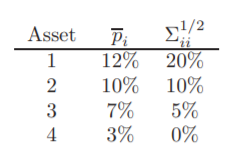

Asset 4 is a risk-free asset, with a (certain) $3 \%$ return. Assets $3,2,$ and 1 have increasing mean returns, ranging from $7 \%$ to $12 \%$, as well as increasing standard deviations, which range from $5 \%$ to $20 \%$. The correlation coefficients between the assets are $\rho_{12}=30 \%, \rho_{13}=-40 \%,$ and $\rho_{23}=0 \%$.

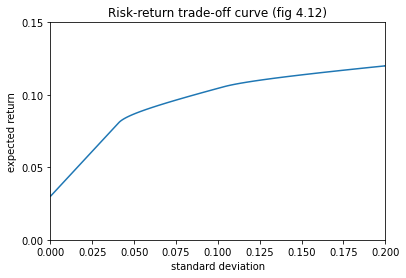

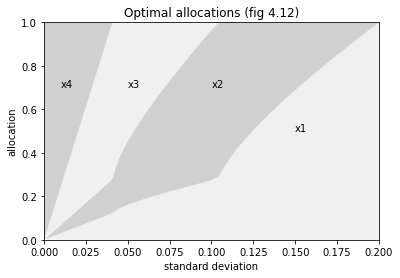

In [2]:
from math import sqrt
from cvxopt import matrix
from cvxopt.blas import dot
from cvxopt.solvers import qp, options

n = 4
S = matrix( [[ 4e-2,  6e-3, -4e-3,   0.0 ],
             [ 6e-3,  1e-2,  0.0,    0.0 ],
             [-4e-3,  0.0,   2.5e-3, 0.0 ],
             [ 0.0,   0.0,   0.0,    0.0 ]] )
pbar = matrix([.12, .10, .07, .03])

G = matrix(0.0, (n,n))
G[::n+1] = -1.0
h = matrix(0.0, (n,1))
A = matrix(1.0, (1,n))
b = matrix(1.0)

N = 100
mus = [ 10**(5.0*t/N-1.0) for t in range(N) ]
options['show_progress'] = False
xs = [ qp(mu*S, -pbar, G, h, A, b)['x'] for mu in mus ]
returns = [ dot(pbar,x) for x in xs ]
risks = [ sqrt(dot(x, S*x)) for x in xs ]

try: import pylab
except ImportError: pass
else:
    pylab.figure(1, facecolor='w')
    pylab.plot(risks, returns)
    pylab.xlabel('standard deviation')
    pylab.ylabel('expected return')
    pylab.axis([0, 0.2, 0, 0.15])
    pylab.title('Risk-return trade-off curve (fig 4.12)')
    pylab.yticks([0.00, 0.05, 0.10, 0.15])

    pylab.figure(2, facecolor='w')
    c1 = [ x[0] for x in xs ]
    c2 = [ x[0] + x[1] for x in xs ]
    c3 = [ x[0] + x[1] + x[2] for x in xs ]
    c4 = [ x[0] + x[1] + x[2] + x[3] for x in xs ]
    pylab.fill(risks + [.20], c1 + [0.0], facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c2[-1::-1] + c1,
        facecolor = '#D0D0D0')
    pylab.fill(risks[-1::-1] + risks, c3[-1::-1] + c2,
        facecolor = '#F0F0F0')
    pylab.fill(risks[-1::-1] + risks, c4[-1::-1] + c3,
        facecolor = '#D0D0D0')
    pylab.axis([0.0, 0.2, 0.0, 1.0])
    pylab.xlabel('standard deviation')
    pylab.ylabel('allocation')
    pylab.text(.15,.5,'x1')
    pylab.text(.10,.7,'x2')
    pylab.text(.05,.7,'x3')
    pylab.text(.01,.7,'x4')
    pylab.title('Optimal allocations (fig 4.12)')
    pylab.show()


Figure 4.12 shows the optimal trade-off curve for this portfolio optimization
problem. The plot is given in the conventional way, with the horizontal axis showing standard deviation (i.e., squareroot of variance) and the vertical axis showing
expected return. The lower plot shows the optimal asset allocation vector x for
each Pareto optimal point.
The results in this simple example agree with our intuition. For small risk,
the optimal allocation consists mostly of the risk-free asset, with a mixture of the
other assets in smaller quantities. Note that a mixture of asset 3 and asset 1, which
are negatively correlated, gives some hedging, i.e., lowers variance for a given level
of mean return. At the other end of the trade-off curve, we see that aggressive
growth portfolios (i.e., those with large mean returns) concentrate the allocation
in assets 1 and 2, the ones with the largest mean returns (and variances).

## References

* Original problem formulation:
  - S.P. Boyd, and L. Vandenberghe, Chapter 4. Convex Optimization. Cambridge University Press, New York, 2004.